# Investigating Experimental Data Using Linear Regression

This notebook will be using linear regression models to investigate an real experimental data set. We will be examining the effects of class size reduction and teacher experience on student achievement. The notebook is organized as follows:

1) Load and discuss the data set

2) Examine effect of class size on test score 

3) Examine effect of teacher experience on test score

4) Investigate whether the effect of class size depends on the teacher's experience

5) Practice problems to work on (hints provided)

Note that the analysis in this notebook is conducted for education purposes and should not be taken seriously in terms of formulation policies.

## Load Data Set and Dependencies 
We will be working with a real experimental data set (publicly available), the code below loads the dataset and also some python libraries that are helpfull for data analysis.

In [41]:
# Import dependencies
# numpy for matrix algbera
import numpy as np
# Pandas for data manipulation
import pandas as pd
# matplotlib for data visualization
import matplotlib.pyplot as plt
# Regression analysis
import statsmodels.api as sm

# Change size of figures
fig_size = [11,7]
plt.rcParams["figure.figsize"] = fig_size
plt.rc('text', usetex = False)

# Load the STAR data
educ_data = pd.read_csv("STARdata.csv")

# Use random subset of data (if required)
# We only use part of the data so that the confidence bands are more visible for practicing
educ_data["UniformRand"] = np.random.randint(7, size = len(educ_data["studentid"]))
educ_data = educ_data[educ_data["UniformRand"] == 1]

# Show structure of data set
educ_data.head()

,studentid,gkclasstype,gkfreelunch,gkmotivraw,gkselfconcraw,readperc_k,mathperc_k,SmallClassK,minority,StudentMale,MasterDegreeK,abovemedianexp_k,gktyears,UniformRand
8,10286,2,0.0,27.0,61.0,68.954247,79.541733,0,0.0,1,1,0,6,1
12,10291,3,0.0,28.0,59.0,60.784313,63.666122,0,0.0,1,0,0,5,1
22,10313,1,1.0,24.0,57.0,77.614380,89.034370,1,0.0,1,1,1,14,1
24,10319,3,0.0,NaN,NaN,64.052284,81.342064,0,0.0,1,0,0,8,1
50,10481,1,0.0,26.0,62.0,65.849670,75.122749,1,0.0,1,0,0,6,1


## Data Description and Problem

In 1985 the state of Tennessee began The Student/Teacher Achievement Ratio (STAR) Project which was a four-year longitudinal class-size study funded by the State Department of Education. About 6000 students in 79 schools were randomly assigned into small and large classes in kindergarten. The data set for this study is publicly available, we will use a small subset of it here. In particular, we will keep cognitive and noncognitive outcomes, student and teacher characteristics, and the class size. I have already processed the data for the purposes of this notebook. Note that we randomly picked a small subset of the data for educational purposes (bigger standard errors on results).


In [42]:
# Important subset
educ_data_subset = educ_data[["mathperc_k", "SmallClassK", "abovemedianexp_k", "StudentMale", "minority"]]

# Summary statistics for data set (mean, stdev, min, max, etc)
educ_data_subset.describe()

,mathperc_k,SmallClassK,abovemedianexp_k,StudentMale,minority
count,854.000000,854.000000,854.000000,854.000000,854.000000
mean,73.191336,0.312646,0.523419,0.502342,0.324356
std,8.148654,0.463843,0.499744,0.500288,0.468408
min,49.754501,0.000000,0.000000,0.000000,0.000000
25%,66.939445,0.000000,0.000000,0.000000,0.000000
50%,72.504089,0.000000,1.000000,1.000000,0.000000
75%,78.232407,1.000000,1.000000,1.000000,1.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000


The average math score is $73\%,$ approximately 1/3 of the classes are small (13-17 students) and also 1/3 of the students are minorities.


## Main Effect: Impact of class size reduction on math scores

In this section we will investigate the causal effects of students being in a smaller class on their math achievement. There two class types, small classes contain 13-17 students and the large classes have 22-25 students. We define the variable $SmallClass_{i} = I(\text{student i in small class})$ is 1 if the student is in the small class and 0 otherwise.  

Since class sizes (small or large) are randomly assigned across students, we can simply compare the mean test scores across the two groups using a linear regression:

$$E(Score_{i}|SmallClass_{i})  = \beta_{0} + \beta_{1}SmallClass_{i}$$

Note that the main coeffecient of interest is $$\beta_{1} = E(Score_{i}|SmallClass_{i} = 1) - E(Score_{i}|SmallClass_{i} = 0).$$ 

In [43]:
# Math score outcome
MathScore = educ_data["mathperc_k"]

# Small class indicator
SmallClass = educ_data["SmallClassK"]
SmallClass = sm.add_constant(SmallClass)

# Linear regression as specefied in text
model = sm.OLS(MathScore, SmallClass).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             mathperc_k   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     82.49
Date:                Mon, 08 Oct 2018   Prob (F-statistic):           7.25e-19
Time:                        23:48:43   Log-Likelihood:                -2963.4
No. Observations:                 854   AIC:                             5931.
Df Residuals:                     852   BIC:                             5940.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          71.5595      0.321    222.697      0.000      70.929      72.190
SmallClassK     5.2196      0.575      9.083      0.000       4.092       6.348
==============================================================================
Omnibus:                       27.410   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.235
Skew:                           0.447   Prob(JB):                     4.48e-07
Kurtosis:                       3.144   Cond. No.                         2.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In sample we can estimate the primary parameter as $$\widehat{\beta_{1}} = \frac{1}{n_{small}}\sum_{i=1}^{n_{small}}MathScore_{i} - \frac{1}{n_{large}}\sum_{i=1}^{n_{large}}MathScore_{i}.$$ As can be observed in the regression output above, $\widehat{\beta_{1}} = 5.2.$ On average being in a small class size will lead math test scores to be 5.2 percentage points better.  

### Illustrating Class Size Main Effect

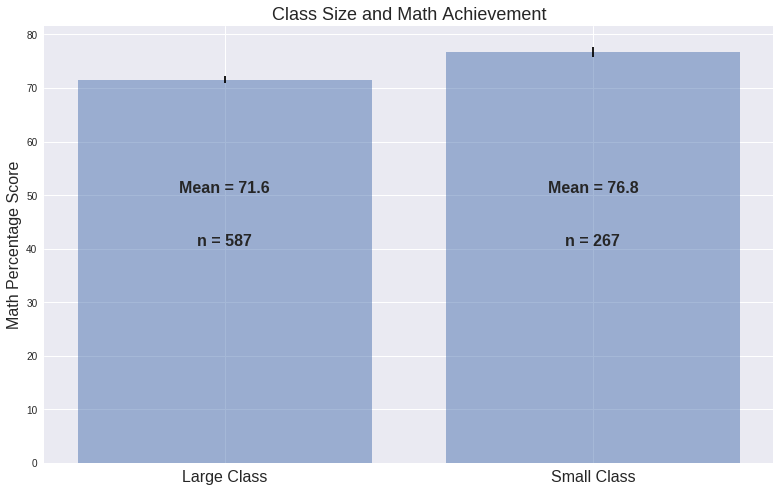

In [44]:
## Bar plot showing main effects of class size on math achievement
# Calculate the math average by class size group
meanscore_large = educ_data.groupby('SmallClassK', as_index=False).mathperc_k.mean()["mathperc_k"][0]
meanscore_small = educ_data.groupby('SmallClassK', as_index=False).mathperc_k.mean()["mathperc_k"][1]

#Calculate the math standard deviation by teacher experience group
stdscore_large = educ_data.groupby('SmallClassK', as_index=False).mathperc_k.std()["mathperc_k"][0]
stdscore_small = educ_data.groupby('SmallClassK', as_index=False).mathperc_k.std()["mathperc_k"][1]

# Number of students in each group
n_small = np.sum(educ_data["SmallClassK"])
n_large = np.size(educ_data["SmallClassK"]) - n_small


# Create Arrays for the plot
class_size = ['Large Class', 'Small Class']
meanscores = [meanscore_large, meanscore_small]
stdscores = [stdscore_large, stdscore_small]
# 95% confidence intervals for means
sescores = [1.96*stdscores[0]/np.sqrt(n_large), 1.96*stdscores[1]/np.sqrt(n_small)]
x_pos = np.arange(len(class_size))

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, meanscores, yerr=sescores, align='center', alpha=0.5, ecolor='black', capsize=20)
ax.set_ylabel('Math Percentage Score', fontsize = 16)
ax.set_xticks(x_pos)
ax.set_xticklabels(class_size, fontsize = 16)
ax.text(0, 50, 'Mean = %s' % np.round(meanscores[0],1), ha='center', va='bottom', fontweight='bold', fontsize = 16)
ax.text(1, 50, 'Mean = %s' % np.round(meanscores[1],1), ha='center', va='bottom', fontweight='bold', fontsize = 16)
ax.text(0, 40, 'n = %s' %n_large, ha='center', va='bottom', fontweight='bold', fontsize = 16)
ax.text(1, 40, 'n = %s' %n_small, ha='center', va='bottom', fontweight='bold', fontsize = 16)
ax.set_title('Class Size and Math Achievement', fontsize = 18)
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.show()

## Main Effect: Impact of teacher experience on math scores
Now we will examine the effects of having a experienced teacher on math test scores. Here we defined an experience teacher if they have more than 9 years of experience, and inexperience otherwise. That is the variable $ExpTeacher_{i} = I(\text{Teacher Experience > 9 years})$ is a binary variable. 

Since teachers are randomly assigned to class rooms, we can compare the math test scores across the experienced and inexperience group using a linear regression:

$$E(Score_{i}|ExpTeacher_{i})  = \alpha_{0} + \alpha_{1}ExpTeacher_{i}.$$

The main parameter of interest is $\alpha_{1}$

$$\alpha_{1} = E(Score_{i}|ExpTeacher_{i} = 1) - E(Score_{i}|ExpTeacher_{i} = 0).$$ 

In [45]:
# Teacher experience indicator
ExpTeacher = educ_data["abovemedianexp_k"]
ExpTeacher = sm.add_constant(ExpTeacher)

# Linear regression as specefied in text
model = sm.OLS(MathScore, ExpTeacher).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             mathperc_k   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     34.21
Date:                Mon, 08 Oct 2018   Prob (F-statistic):           7.04e-09
Time:                        23:48:51   Log-Likelihood:                -2986.0
No. Observations:                 854   AIC:                             5976.
Df Residuals:                     852   BIC:                             5986.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               71.5145      0.396    180.468      0.000      70.737      72.292
abovemedianexp_k     3.2037      0.548      5.849      0.000       2.129       4.279
==============================================================================
Omnibus:                       40.332   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.109
Skew:                           0.530   Prob(JB):                     1.60e-10
Kurtosis:                       3.382   Cond. No.                         2.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In sample we can estimate the primary parameter as $$\widehat{\alpha_{1}} = \frac{1}{n_{experience}}\sum_{i=1}^{n_{experience}}MathScore_{i} - \frac{1}{n_{inexperience}}\sum_{i=1}^{n_{inexperience}}MathScore_{i}.$$ As can be observed in the regression output above, $\widehat{\alpha_{1}} = 3.2.$ On average having an experienced teacher will lead math test scores to be 3.2 percentage points better.  

### Illustrating Teacher Experience Main Effect

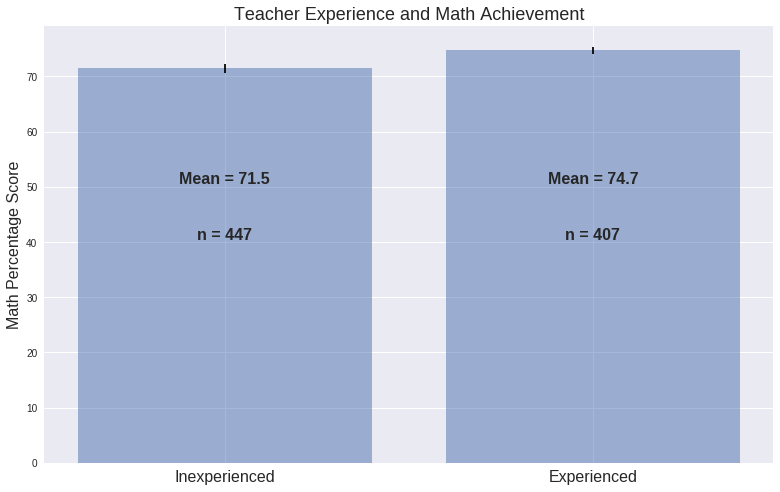

In [46]:
## Bar plot showing main effects of teacher experience on math achievement
# Calculate the math average by teacher experience group
meanscore_inexp = educ_data.groupby('abovemedianexp_k', as_index=False).mathperc_k.mean()["mathperc_k"][0]
meanscore_exp = educ_data.groupby('abovemedianexp_k', as_index=False).mathperc_k.mean()["mathperc_k"][1]

#Calculate the math standard deviation by teacher experience group
stdscore_inexp = educ_data.groupby('abovemedianexp_k', as_index=False).mathperc_k.std()["mathperc_k"][0]
stdscore_exp = educ_data.groupby('abovemedianexp_k', as_index=False).mathperc_k.std()["mathperc_k"][1]

# Number of students in each group
n_exp = np.sum(educ_data["abovemedianexp_k"])
n_inexp = np.size(educ_data["abovemedianexp_k"]) - n_exp


# Create Arrays for the plot
teacher_exp = ['Inexperienced', 'Experienced']
meanscores = [meanscore_inexp, meanscore_exp]
stdscores = [stdscore_inexp, stdscore_exp]
# 95% confidence intervals for means
sescores = [1.96*stdscores[0]/np.sqrt(n_inexp), 1.96*stdscores[1]/np.sqrt(n_exp)]
x_pos = np.arange(len(teacher_exp))

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, meanscores, yerr=sescores, align='center', alpha=0.5, ecolor='black', capsize=20)
ax.set_ylabel('Math Percentage Score', fontsize = 16)
ax.set_xticks(x_pos)
ax.set_xticklabels(teacher_exp, fontsize = 16)
ax.text(0, 50, 'Mean = %s' % np.round(meanscores[0],1), ha='center', va='bottom', fontweight='bold', fontsize = 16)
ax.text(1, 50, 'Mean = %s' % np.round(meanscores[1],1), ha='center', va='bottom', fontweight='bold', fontsize = 16)
ax.text(0, 40, 'n = %s' %n_exp, ha='center', va='bottom', fontweight='bold', fontsize = 16)
ax.text(1, 40, 'n = %s' %n_inexp, ha='center', va='bottom', fontweight='bold', fontsize = 16)
ax.set_title('Teacher Experience and Math Achievement', fontsize = 18)
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.show()

## Interaction Effect: Class Size Effects Depends on Experience

The two effects we studied above are both main effects, in this section we will consider an interaction effect. In particular we will explore whether the benefits to class size reduction depend on the teacher's experience. Consider the following linear regression:

$$E(Score_{i}|SmallClass_{i}, ExpTeacher_{i})  = \theta_{0} + \theta_{1}SmallClass_{i} + \theta_{2}ExpTeacher_{i} + \theta_{3}SmallClass_{i} \times ExpTeacher_{i},$$

where $SmallClass_{i} \times ExpTeacher_{i}$ is the interaction term in the regression.

The primary parameter of interest is $\theta_{3}:$

$$\theta_{3} = [E(Score_{i}|SmallClass_{i}=1, ExpTeacher_{i}=1) - E(Score_{i}|SmallClass_{i}=0, ExpTeacher_{i}=1) ] - [E(Score_{i}|SmallClass_{i}=1, ExpTeacher_{i}=0) - E(Score_{i}|SmallClass_{i}=0, ExpTeacher_{i}=0) ].$$
Note that $\theta_{3}$ is a difference-in-difference of means, the first difference is the benefits from class size reduction for experienced and inexperenced teacher, and then we difference these benefits. That is $$\theta_{3} = \text{Mean benefits to class size reduction for experienced teacher} - \text{Mean benefits to class size reduction for inexperienced teacher}.$$


In [47]:
# Interaction term: I(small) x I(experienced)
educ_data["Interaction"] = educ_data["abovemedianexp_k"]*educ_data["SmallClassK"]

#SmallExpTeacher = sm.add_constant(SmallExpTeacher)

# Design matrix
X = educ_data[["SmallClassK", "abovemedianexp_k", "Interaction"]]
X = sm.add_constant(X)

# Note the difference in argument order
model = sm.OLS(MathScore, X).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             mathperc_k   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     46.24
Date:                Mon, 08 Oct 2018   Prob (F-statistic):           1.10e-27
Time:                        23:49:02   Log-Likelihood:                -2938.3
No. Observations:                 854   AIC:                             5885.
Df Residuals:                     850   BIC:                             5904.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               69.1870      0.458    151.035      0.000      68.288      70.086
SmallClassK          7.0692      0.798      8.855      0.000       5.502       8.636
abovemedianexp_k     4.4351      0.626      7.081      0.000       3.206       5.664
Interaction         -3.3855      1.118     -3.027      0.003      -5.580      -1.191
==============================================================================
Omnibus:                       32.028   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.690
Skew:                           0.474   Prob(JB):                     2.93e-08
Kurtosis:                       3.279   Cond. No.                         6.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In sample we can estimate the primary parameter as $$\widehat{\theta_{3}} = \big[\frac{1}{n_{small,exp}}\sum_{i=1}^{n_{small,exp}}MathScore_{i} - \frac{1}{n_{large,exp}}\sum_{i=1}^{n_{large,exp}}MathScore_{i}\big] -  \big[\frac{1}{n_{small,inexp}}\sum_{i=1}^{n_{small,inexp}}MathScore_{i} - \frac{1}{n_{large,inexp}}\sum_{i=1}^{n_{large,inexp}}MathScore_{i}\big].$$

As can be observed in the regression output above, $\widehat{\theta_{3}} = -3.3.$ On average less experienced teachers will benefit 3.3 percentage points in math performance more from class size reducation than experienced teachers.  


### Illustrating Dependance of The Class Size Effect on Teacher Experience


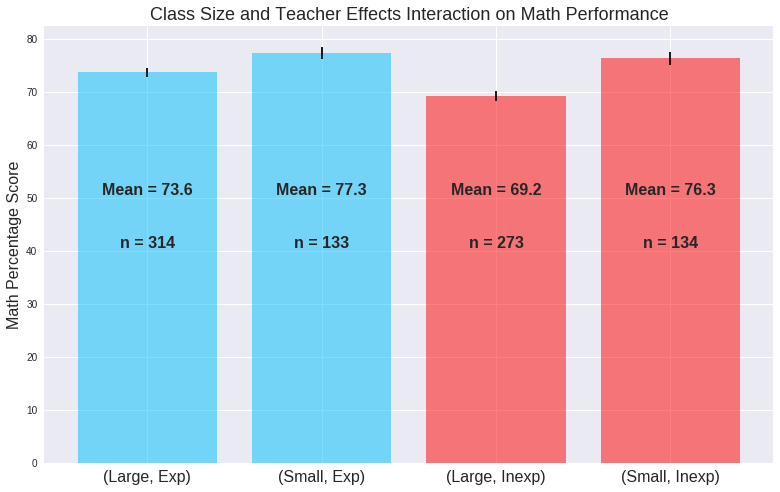

In [48]:
## Bar plot showing interaction effects of teacher experience and class size
# Average test score by (exp, size) group
mean_large_inexp = educ_data.groupby(['abovemedianexp_k', 'SmallClassK'], as_index=False).mathperc_k.mean()['mathperc_k'][0]
mean_small_inexp = educ_data.groupby(['abovemedianexp_k', 'SmallClassK'], as_index=False).mathperc_k.mean()['mathperc_k'][1]
mean_large_exp = educ_data.groupby(['abovemedianexp_k', 'SmallClassK'], as_index=False).mathperc_k.mean()['mathperc_k'][2]
mean_small_exp = educ_data.groupby(['abovemedianexp_k', 'SmallClassK'], as_index=False).mathperc_k.mean()['mathperc_k'][3]

# Stdev for test score by (exp, size) group
std_large_inexp = educ_data.groupby(['abovemedianexp_k', 'SmallClassK'], as_index=False).mathperc_k.std()['mathperc_k'][0]
std_small_inexp = educ_data.groupby(['abovemedianexp_k', 'SmallClassK'], as_index=False).mathperc_k.std()['mathperc_k'][1]
std_large_exp = educ_data.groupby(['abovemedianexp_k', 'SmallClassK'], as_index=False).mathperc_k.std()['mathperc_k'][2]
std_small_exp = educ_data.groupby(['abovemedianexp_k', 'SmallClassK'], as_index=False).mathperc_k.std()['mathperc_k'][3]

# Number of students per group
n_large_inexp = educ_data.groupby(['abovemedianexp_k', 'SmallClassK'], as_index=False).mathperc_k.size()[0][0]
n_small_inexp = educ_data.groupby(['abovemedianexp_k', 'SmallClassK'], as_index=False).mathperc_k.size()[0][1]
n_large_exp = educ_data.groupby(['abovemedianexp_k', 'SmallClassK'], as_index=False).mathperc_k.size()[2]
n_small_exp = educ_data.groupby(['abovemedianexp_k', 'SmallClassK'], as_index=False).mathperc_k.size()[3]

# Create Arrays for the plot
groups = ['(Large, Exp)', '(Small, Exp)','(Large, Inexp)', '(Small, Inexp)']
meanscores = [mean_large_exp, mean_small_exp, mean_large_inexp, mean_small_inexp]
stdscores = [std_large_exp, std_small_exp, std_large_inexp, std_small_inexp]
# 95% confidence intervals for means
sescores = [1.96*stdscores[0]/np.sqrt(n_large_exp), 1.96*stdscores[1]/np.sqrt(n_small_exp), 1.96*stdscores[0]/np.sqrt(n_large_inexp), 1.96*stdscores[1]/np.sqrt(n_small_inexp)]
x_pos = np.arange(len(groups))

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, meanscores, yerr=sescores, align='center', alpha=0.5, ecolor='black', capsize=20, color=['deepskyblue', 'deepskyblue', 'red', 'red'])
ax.set_ylabel('Math Percentage Score', fontsize = 16)
ax.set_xticks(x_pos)
ax.set_xticklabels(groups, fontsize = 16)
ax.text(0, 50, 'Mean = %s' % np.round(meanscores[0],1), ha='center', va='bottom', fontweight='bold', fontsize = 16)
ax.text(1, 50, 'Mean = %s' % np.round(meanscores[1],1), ha='center', va='bottom', fontweight='bold', fontsize = 16)
ax.text(2, 50, 'Mean = %s' % np.round(meanscores[2],1), ha='center', va='bottom', fontweight='bold', fontsize = 16)
ax.text(3, 50, 'Mean = %s' % np.round(meanscores[3],1), ha='center', va='bottom', fontweight='bold', fontsize = 16)
ax.text(0, 40, 'n = %s' %n_large_exp, ha='center', va='bottom', fontweight='bold', fontsize = 16)
ax.text(1, 40, 'n = %s' %n_small_exp, ha='center', va='bottom', fontweight='bold', fontsize = 16)
ax.text(2, 40, 'n = %s' %n_large_inexp, ha='center', va='bottom', fontweight='bold', fontsize = 16)
ax.text(3, 40, 'n = %s' %n_small_inexp, ha='center', va='bottom', fontweight='bold', fontsize = 16)
ax.set_title('Class Size and Teacher Effects Interaction on Math Performance', fontsize = 18)
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.show()

## Extensions To Consider

For those interested in practicing, I have suggestion a few extensions below. I provide the regression for eact extension, hence you should be able to make adjustments to the code above to adress each of the new questions.

$\textbf{Hetregenous effects of class size reduction by gender:}$

Are the benefits of class size reducation different for male students relative to female students? The following regression can help us explore this question:


$$E(Score_{i}|SmallClass_{i}, Male_{i}) = \tau_{0} + \tau_{1}SmallClass_{i} +   \tau_{2}Male_{i} + \tau_{3}SmallClass_{i} \times Male_{i}$$ 

$\textbf{Treat experience as continous variable (rather than binary):}$

In the above analysis we categorized an experience teacher if they had more than 9 years of experience, and inexperienced otherwise. Although this simplifies interpretation of the results, we observe the exact years of teacher experience in "gktyears". Consider the following regression:

$$E(Score_{i}|SmallClass_{i}, Exp_{i}) = \delta_{0} + \delta_{1}SmallClass_{i} +   \delta_{2}Exp_{i} + \delta_{3}SmallClass_{i} \times Exp_{i},$$  
where $Exp_{i}$ is a continous variable representing teacher experience. Estimate the above model and think about the interpretation of $\hat{\delta_{3}}.$ Notice that $$\frac{dE(Score_{i}|SmallClass_{i}, Exp_{i})}{dExp_{i}} = \delta_{2} + \delta_{3}SmallClass_{i}.$$



$\textbf{3x2 factorial design:}$

The real data actually has 3 treatment groups (small class, large class, large class + teacher aide). In the above analysis I combined the large class treatment into one. The "gkclasstype" variable indicates which group the observation is randomly assigned into. For the 3x2 design, consider the following regression:

$$E(Score_{i}|LargeClass_{i}, LargeClassAide_{i}, ExpTeacher_{i}) = \gamma_{0} + \gamma_{1}LargeClass_{i} + \gamma_{2}LargeClassAide_{i} + \gamma_{3}ExpTeacher_{i} + \gamma_{4}LargeClass_{i}\times ExpTeacher_{i} + \gamma_{5}LargeClassAide_{i}\times ExpTeacher_{i},$$ 

where $LargeClass_{i} = I($student in large class) and  $LargeClassAide_{i} = I($student in large class and teacher aide). Note that there is also $SmallClass_{i} = I($student in small class) but it has to omitted from the regression (think about why this is the case).

$\textbf{Effects of class size reduction on non-cognitive outcomes}:$

The data contains non-cognitive outcomes such as motivation and self-concept. I imagine the psychologists will know more about this. You can replicate the above analysis using non-cognitive outcomes. The non-cogntive outcomes are the variables "gkmotivraw" and 	"gkselfconcraw" in the data.



## Conclusion

In this notebook we examined whether class size reduction can increase student achievement and if these test score gains depend on the teachers experience. We used linear regression model to explore main effects of class size reduction and teacher experience and their interaction on test scores. We found that on average having small classes or an experienced teachers increases test scores as would be expected. However the benefits to smaller classes is larger for experienced teachers relative to inexperienced teachers. 